In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#import Twitter API keys
from config import access_token,access_token_secret,consumer_key,consumer_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [73]:
# Target Account
target_user = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]


# Variables for holding sentiments
sentiments = []
# Loop through each user
for user in target_user:
    counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets each)
    for x in range(5):        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)
        # Loop through all tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Variables for holding additional info
            user = tweet["user"]["screen_name"]
            
            tweets_ago  = counter


            # Add each value to the appropriate array
            sentiments.append({"Media Source":user,
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg,
                       "Date": tweet["created_at"],
                       "Tweets Ago": counter,
                        "Tweet": tweet["text"]}) 
            counter= counter +1

In [81]:
# Convert sentiments to DataFrame
total_sentiments = pd.DataFrame.from_dict(sentiments)
total_sentiments= total_sentiments[["Media Source", "Compound","Positive", "Negative","Neutral","Date","Tweets Ago","Tweet"]]
total_sentiments.head()

,Media Source,Compound,Positive,Negative,Neutral,Date,Tweets Ago,Tweet
0,BBC,0.0000,0.000,1.000,0.000,Fri Mar 30 17:29:06 +0000 2018,1,"An Oscar-winning short film, The Silent Child ..."
1,BBC,0.0000,0.000,1.000,0.000,Fri Mar 30 17:06:00 +0000 2018,2,'Change doesn't come from outside.'\n\n#Pilgri...
2,BBC,0.5719,0.266,0.734,0.000,Fri Mar 30 16:26:45 +0000 2018,3,❤️ A dying man was granted his final wish in h...
3,BBC,-0.2144,0.073,0.810,0.116,Fri Mar 30 16:02:04 +0000 2018,4,The illegal wildlife trade is worth £18bn per ...
4,BBC,0.8715,0.377,0.623,0.000,Fri Mar 30 15:25:47 +0000 2018,5,RT @bbceurovision: 🇬🇧 Presenting our 2018 drea...


In [82]:
bbc_df= total_sentiments.loc[total_sentiments["Media Source"] == "BBC",:]
cbs_df= total_sentiments.loc[total_sentiments["Media Source"] == "CBS",:]
cnn_df= total_sentiments.loc[total_sentiments["Media Source"] == "CNN",:]
nyt_df= total_sentiments.loc[total_sentiments["Media Source"] == "nytimes",:]
fox_df= total_sentiments.loc[total_sentiments["Media Source"] == "FoxNews",:]

In [83]:
total_sentiments.to_csv("Media_Sentiment_Data.csv", header = True)

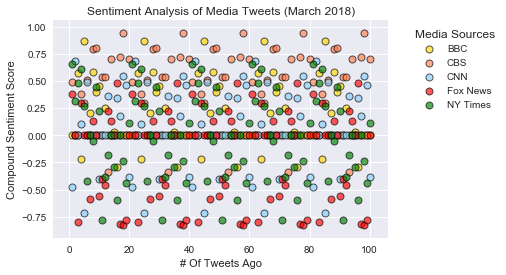

In [84]:
#Sentiment Analysis of Media Tweet (scatter plot)

sns.set()

bbc_plt= plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound"], 
                       color="gold", linewidth=1.0, alpha=0.65, edgecolors="black")
cbs_plt= plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound"], 
                       color="coral", linewidth=1.0, alpha=0.65, edgecolors="black")
fox_plt= plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"], 
                       color="lightskyblue", linewidth=1.0, alpha=0.65, edgecolors="black")
cnn_plt= plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], 
                       color="red", linewidth=1.0, alpha=0.65, edgecolors="black")
nyt_plt= plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound"], 
                       color="green", linewidth=1.0, alpha=0.65, edgecolors="black")

labels = ["BBC", "CBS", "CNN", "Fox News", "NY Times"]

plt.legend(labels, bbox_to_anchor=(1.2, 1), 
          fancybox=True, shadow=True, ncol=1, loc='upper center', title="Media Sources")

plt.title("Sentiment Analysis of Media Tweets (March 2018)")
plt.xlabel("# Of Tweets Ago")
plt.ylabel("Compound Sentiment Score")

plt.grid(True)
plt.show()

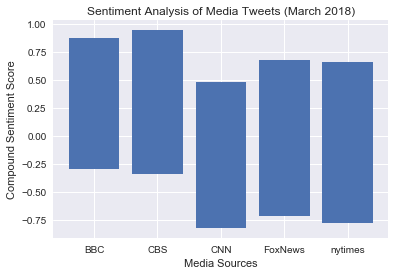

In [85]:
#Sentiment Analysis of Media Tweet (bar chart)
sns.set()

plt.title("Sentiment Analysis of Media Tweets (March 2018)")
plt.xlabel("Media Sources")
plt.ylabel("Compound Sentiment Score")

plt.bar(total_sentiments["Media Source"],total_sentiments["Compound"], alpha=1, align="center"      )


plt.show()